# Numerical evaluation of the Fresnel Integral

Fresnel functions are used in optics to describe near-field diffraction. They can be written as an integral (or infinite sum):

$S(x)=\int_0^x \sin(\pi t^2/2)dt$

Below we use scipy implementation of the Fresnel integral to test our evaluation using the midpoint, trapezoid, and Simpson's rule integration.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

## Functions for calculating integral:

In [20]:
def midpoint(x_hi,subints):

    x_low = 0
    dx = (x_hi-x_low)/subints
    x_mid = x_low + 0.5*dx
    
    integral=0.0
    for i in range(subints):
        integral += dx*np.sin(np.pi*x_mid**2/2.0)
        x_mid += dx

    return integral 

def trapezoid(x_hi,subints):

    x_low = 0
    dx = (x_hi-x_low)/subints
    x_i = x_low
    x_f = x_low + dx
    
    integral=0.0
    for i in range(subints):
        integral += dx*(np.sin(np.pi*x_i**2/2.0)+np.sin(np.pi*x_f**2/2.0))/2.0
        x_i += dx
        x_f += dx

    return integral 

def simpson(x_hi,subints):

    x_low = 0
    dx = (x_hi-x_low)/subints
    x_mid = x_low + 0.5*dx
    x_i = x_low
    x_f = x_low + dx
 
    integral=0.0
    for i in range(subints):
        integral += dx*(np.sin(np.pi*x_i**2/2.0)+4.0*np.sin(np.pi*x_mid**2/2.0)+np.sin(np.pi*x_f**2/2.0))/6.0
        x_mid += dx
        x_i += dx
        x_f += dx

    return integral 

## Evaluate integral with different number of subintervals:

In [47]:
# Limit of integration
x_hi=1.0

# Number of subintervals to loop over
n_subint=np.unique(np.logspace(0,4,100).astype(int))

# Evaluate integral for different subintervals
int_mid=[]
int_trap=[]
int_simp=[]
for subints in n_subint:
    int_mid.append(midpoint(x_hi,subints))
    int_trap.append(trapezoid(x_hi,subints))
    int_simp.append(simpson(x_hi,subints))
    

## Plot error versus built in evaluation of Fresnel function:

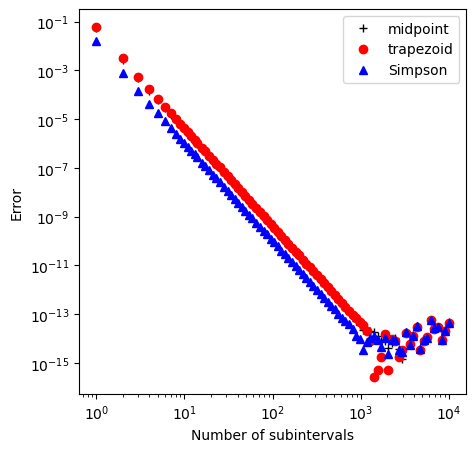

In [49]:
# Scipy has Fresnel integral
S,C=sc.fresnel(x_hi)

# Plot the data
fig_num_int,ax1=plt.subplots(figsize=(5,5))

ax1.plot(n_subint,abs(np.array(int_mid)-S),'k+',label='midpoint')
ax1.plot(n_subint,abs(np.array(int_trap)-S),'ro',label='trapezoid')
ax1.plot(n_subint,abs(np.array(int_simp)-S),'b^',label='Simpson')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Number of subintervals')
ax1.set_ylabel('Error')
ax1.legend()

#plt.savefig('Error_Fres_Int.pdf',bbox_inches='tight')
plt.show()